In [1]:
import pandas as pd

In [2]:
train = pd.read_csv("data/train.csv")

In [4]:
train.head()

,Insult,Date,Comment
0,1,20120618192155Z,"""You fuck your dad."""
1,0,20120528192215Z,"""i really don't understand your point.\xa0 It ..."
2,0,NaN,"""A\\xc2\\xa0majority of Canadians can and has ..."
3,0,NaN,"""listen if you dont wanna get married to a man..."
4,0,20120619094753Z,"""C\xe1c b\u1ea1n xu\u1ed1ng \u0111\u01b0\u1edd..."


In [22]:
train.Comment[20]

'"@EephusBlue\\xa0Makes you want to say "Mike MacWHOgal?""'

In [5]:
test_with_solutions = pd.read_csv("data/test_with_solutions.csv")

In [6]:
verification_set = pd.read_csv("data/impermium_verification_labels.csv")

In [306]:
#verif_set = pd.read_csv("data/impermium_verification_set.csv")

In [32]:
test = pd.read_csv("data/test.csv")

In [28]:
!ls data

impermium_verification_labels.csv  test.csv
impermium_verification_set.csv	   test_with_solutions.csv
sample_submission_null.csv	   train.csv


In [30]:
test_with_solutions.sort_values(by='Comment').head()

,Insult,Date,Comment,Usage
1733,0,NaN,""" ""I didn\\'t spend 25 years making 170 pictur...",PublicTest
2356,0,20120611234007Z,""""" I have a job to do to defend the right of t...",PrivateTest
724,0,20120610162824Z,""""" Oh shit there's more ! "" Fucking perfection...",PrivateTest
273,1,20120609231946Z,""""" we let you in""? Who's we? YOU didn't let an...",PrivateTest
786,0,20120620031414Z,"""""...our country is in a pile of deep shit.""\x...",PrivateTest


In [34]:
test.sort_values(by='Comment').head()

,id,Date,Comment
1026,1027,20120529011348Z,""" Are you trying to tell us something?????"""
627,628,20120601034035Z,""" Get your eyes checked! Fat is never beautifu..."
91,92,20120602222445Z,""" No. you didn't talk about your IQ!"""
1877,1878,20120527025100Z,""" Omg this looks like you MOM!"""
1836,1837,20120602090351Z,"""!!! Is it from your camera?"""


In [36]:
verification_set.sort_values(by='Comment').head()

,id,Insult,Date,Comment,Usage
1026,1027,0,20120529011348Z,""" Are you trying to tell us something?????""",PrivateTest
627,628,1,20120601034035Z,""" Get your eyes checked! Fat is never beautifu...",PrivateTest
91,92,0,20120602222445Z,""" No. you didn't talk about your IQ!""",PrivateTest
1877,1878,0,20120527025100Z,""" Omg this looks like you MOM!""",PrivateTest
1836,1837,0,20120602090351Z,"""!!! Is it from your camera?""",PrivateTest


In [31]:
test_public = test_with_solutions[test_with_solutions.Usage == "PublicTest"]

In [9]:
test_private = test_with_solutions[test_with_solutions.Usage == "PrivateTest"]

In [10]:
train_total = pd.concat([train, test_with_solutions.iloc[:, :-1]]).reset_index()

In [11]:
train_total.head()

,index,Insult,Date,Comment
0,0,1,20120618192155Z,"""You fuck your dad."""
1,1,0,20120528192215Z,"""i really don't understand your point.\xa0 It ..."
2,2,0,NaN,"""A\\xc2\\xa0majority of Canadians can and has ..."
3,3,0,NaN,"""listen if you dont wanna get married to a man..."
4,4,0,20120619094753Z,"""C\xe1c b\u1ea1n xu\u1ed1ng \u0111\u01b0\u1edd..."


In [315]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidv = TfidfVectorizer()

X_train = tfidv.fit_transform(train_total.Comment)
y_train = train_total.Insult
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()

logr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [316]:
from sklearn.metrics import roc_auc_score
X_test = tfidv.transform(test_with_solutions.Comment)
y_test_pred = logr.predict_proba(X_test)[:, 1]
y_test = test_with_solutions.Insult

roc_auc_score(y_test, y_test_pred)


0.96251297888964227

In [317]:
from sklearn.metrics import roc_auc_score
X_ver = tfidv.transform(verif_set.Comment)
y_ver_pred = logr.predict_proba(X_ver)[:, 1]
y_ver = verif_set.Insult

roc_auc_score(y_ver, y_ver_pred)



0.75345864143185437

In [324]:
from sklearn.feature_extraction.text import TfidfVectorizer

pl.fit(train_total.Comment, train_total.Insult)


((6594,), (6594, 1))


Pipeline(steps=[('fu', FeatureUnion(n_jobs=1,
       transformer_list=[('fe', FeatureExtractor()), ('tfidv_char', TfidfVectorizer(analyzer='char', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=No...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [325]:
y_ver_pred = pl.predict_proba(verif_set.Comment)[:, 1]
y_ver = verif_set.Insult

roc_auc_score(y_ver, y_ver_pred)


((2235,), (2235, 1))


0.8169469821980393

In [320]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(X_train, y_train)

X_ver = tfidv.transform(verif_set.Comment)
y_ver_pred = clf.predict_proba(X_ver)[:, 1]
y_ver = verif_set.Insult

roc_auc_score(y_ver, y_ver_pred)



0.65956256023656845

In [17]:
s = train_total.reset_index().Comment[4].replace('\\\\', '\\').replace('\\n', '\n')

In [18]:
print(" ".join(s.split()))

"C\xe1c b\u1ea1n xu\u1ed1ng \u0111\u01b0\u1eddng bi\u1ec3u t\xecnh 2011 c\xf3 \xf4n ho\xe0 kh\xf4ng ? C\xe1c ng\u01b0 d\xe2n ng\u1ed3i cu\xed \u0111\u1ea7u chi\u1ee5 nh\u1ee5c c\xf3 \xf4n ho\xe0 kh\xf4ng ? C\xe1c n\xf4ng d\xe2n gi\u1eef \u0111\u1ea5t \u1edf V\u0103n Giang, C\u1ea7n Th\u01a1 c\xf3 \xf4n ho\xe0 kh\xf4ng ? ................. R\u1ed1t cu\u1ed9c \u0111\u01b0\u1ee3c g\xec\xa0 th\xec ch\xfang ta \u0111\xe3 bi\u1ebft ! Ai c\u0169ng y\xeau chu\u1ed9ng ho\xe0 b\xecnh, nh\u01b0ng \u0111\xf4i khi ho\xe0 b\xecnh ch\u1ec9 th\u1eadt s\u1ef1 \u0111\u1ebfn sau chi\u1ebfn tranh m\xe0 th\xf4i. Kh\xf4ng c\xf2n con \u0111\u01b0\u1eddng n\xe0o ch\u1ecdn kh\xe1c \u0111\xe2u, \u0111\u1eebng m\u01a1 th\xeam n\u01b0\xe3."


In [134]:
from bs4 import UnicodeDammit
s = train.Comment[4]

In [20]:
from bs4 import UnicodeDammit
dammit = UnicodeDammit(s)
print(dammit.unicode_markup)
# Sacré bleu!
dammit.original_encoding
# 'utf-8'


In [21]:


import re

re.sub('[?.!-,]', ' ', 'f-df?fff!*')

'f-df fff  '

In [22]:
comments = train_total.Comment

punc_re = re.compile('[?.!,]')

comments = [punc_re.sub(' ', c) for c in comments]

char_re = re.compile('[\"\'-]')

comments = [char_re.sub(' ', c) for c in comments]

comments = [c.replace('\\\\', '\\').replace('\\n', '\n') for c in comments]

comments_non_alpha = []
for c in comments:
    comment = []
    for w in c.split():
        if not re.match('^[a-zA-Z\']*$', w):
            comment.append(w)
    comments_non_alpha.append(comment)

comments = [" ".join(c.split()) for c in comments]

In [31]:
print(comments[1])

i really don t understand your point \xa0 It seems that you are mixing apples and oranges


In [32]:
train_total_clean = train_total.copy()

In [33]:
train_total_clean.Comment = comments

In [242]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidv = TfidfVectorizer()

#X_train = tfidv.fit_transform(train_total_clean.Comment)
X_train = tfidv.fit_transform(train_total.Comment)
y_train = train_total.Insult

from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(C=3.1622776601683795)

logr.fit(X_train, y_train)

LogisticRegression(C=3.16227766017, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [243]:
from sklearn.metrics import roc_auc_score
X_ver = tfidv.transform(verf_set.Comment)
y_ver_pred = logr.predict_proba(X_ver)[:, 1]
y_ver = verf_set.Insult

roc_auc_score(y_ver, y_ver_pred)



0.7804013258860487

In [231]:
X_train.shape

(6594, 21934)

In [296]:
dup_re = re.compile(r"(.)\1{2,}")
remove_char_re = re.compile('[\"\'-]')


from nltk import word_tokenize
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

wordnet_lemmatizer = WordNetLemmatizer()
porter_stemmer = PorterStemmer()

from collections import defaultdict

def preprocessor(s):
    s = s.replace('\\\\', '\\').replace('\\n', '\n')
    s = s.replace('\n', ' ')
    s = dup_re.sub("\g<1>", s)
    s = remove_char_re.sub(" ", s)
    #s = " ".join([wordnet_lemmatizer.lemmatize(wordnet_lemmatizer.lemmatize(w, pos='v')) for w in s.split()])
    return s

In [300]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import FeatureUnion


tfidv_char = TfidfVectorizer(ngram_range=(1, 5), analyzer='char', stop_words='english', preprocessor=preprocessor)
tfidv_word = TfidfVectorizer(ngram_range=(1, 3), analyzer='word', stop_words='english', min_df=3, preprocessor=preprocessor)
tfidv_word = None
fe = FeatureExtractor()

fu = FeatureUnion([('tfidv_char', tfidv_char), ('tfidv_word', tfidv_word)])
fu = FeatureUnion([('fe', fe), ('tfidv_char', tfidv_char), ('tfidv_word', tfidv_word)])
#clf_rf = RandomForestClassifier()
clf_rf = LogisticRegression(C=20)

estimators = [('fu', fu), ('clf', clf_rf)]
pl = Pipeline(estimators)

In [301]:
from sklearn.model_selection import cross_val_score
def scoring(estimator, X, y):
    y_pred = estimator.predict_proba(X)
    return roc_auc_score(y, y_pred[:, 1])

cross_val_score(pl, train_total.Comment, train_total.Insult, scoring=scoring)

((4395,), (4395, 1))
((2199,), (2199, 1))
((4396,), (4396, 1))
((2198,), (2198, 1))
((4397,), (4397, 1))
((2197,), (2197, 1))


array([ 0.89878763,  0.89957711,  0.90915808])

In [285]:

from nltk import word_tokenize
import nltk
l = nltk.pos_tag(word_tokenize(comments[1]))
from scipy import sparse

from sklearn.base import BaseEstimator
class FeatureExtractor(BaseEstimator):
    def __init__(self):
        with open('bad_words.txt') as f:
            self.badwords = set(w.strip() for w in f.readlines())
        
    def fit(self, X, y=None):
        self.fit_transform(X, y)
        return self

    def transform(self, X):
        return self.fit_transform(X)

    def fit_transform(self, X, y=None):

        pos_tags = ["VB", "JJ", "RB", "NN"]
        def pos_tag_count(comment):
            pos = nltk.pos_tag(word_tokenize(comment))
            d = {}
            for tag in pos_tags:
                d[tag] = 0
            for p in pos:
                for tag in pos_tags:
                    if p[1].startswith(tag):
                        d[tag] += 1
            return d.values()
    
        def bad_word_count(comment):
            comment = " ".join([wordnet_lemmatizer.lemmatize(wordnet_lemmatizer.lemmatize(w, pos='v')) 
                          for w in comment.split()])
            cnt = 0
            for w in comment.split():
                if w.strip() in self.badwords:
                    cnt += 1
            return cnt
        
        comments_features = []
        for c in X:
            #features = pos_tag_count(c)
            #features.append(bad_word_count(c))
            features = [bad_word_count(c)]
            comments_features.append(features)
        
        ret = sparse.csr_matrix(comments_features)
        print(X.shape, ret.shape)
        return ret
        
            

In [288]:
fe = FeatureExtractor()

In [289]:
bw_feature = fe.fit_transform(train_total.Comment)

((6594,), (6594, 1))


In [290]:
import matplotlib.pyplot as plt

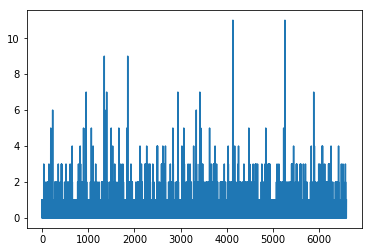

In [291]:
plt.plot(bw_feature.todense())
plt.show()

In [90]:
comments[1]

'i really don t understand your point \\xa0 It seems that you are mixing apples and oranges'

In [95]:
from collections import Counter

c = Counter([i[1] for i in l])

In [96]:
c

Counter({'CC': 1,
         'IN': 1,
         'JJ': 1,
         'NN': 3,
         'NNS': 2,
         'PRP': 2,
         'PRP$': 1,
         'RB': 1,
         'VB': 1,
         'VBG': 1,
         'VBP': 2,
         'VBZ': 1})

In [86]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/amir/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [77]:
cross_val_score(pl, train_total_clean.Comment, train_total_clean.Insult, scoring=scoring)

array([ 0.89708135,  0.89404637,  0.90332566])

In [293]:
from sklearn.model_selection import GridSearchCV
import numpy as np

param_grid = {'clf__C':np.logspace(-1, 2, 5)}
gs = GridSearchCV(pl, param_grid, scoring=scoring, n_jobs=4)
gs.fit(train_total.Comment, train_total.Insult)

((4396,), (4396, 1))
((4395,), (4395, 1))
((4397,), (4397, 1))
((4395,), (4395, 1))
((2198,), (2198, 1))
((2197,), (2197, 1))
((2199,), (2199, 1))
((2199,), (2199, 1))
((4396,), (4396, 1))
((4397,), (4397, 1))
((4395,), (4395, 1))
((4395,), (4395, 1))
((4396,), (4396, 1))
((4397,), (4397, 1))
((4395,), (4395, 1))
((4396,), (4396, 1))
((2198,), (2198, 1))
((2197,), (2197, 1))
((2198,), (2198, 1))
((2199,), (2199, 1))
((4396,), (4396, 1))
((4397,), (4397, 1))
((4395,), (4395, 1))
((4396,), (4396, 1))
((4397,), (4397, 1))
((4395,), (4395, 1))
((4396,), (4396, 1))
((4397,), (4397, 1))
((2197,), (2197, 1))
((2199,), (2199, 1))
((2198,), (2198, 1))
((2197,), (2197, 1))
((4397,), (4397, 1))
((4395,), (4395, 1))
((4396,), (4396, 1))
((4397,), (4397, 1))
((4395,), (4395, 1))
((4396,), (4396, 1))
((4397,), (4397, 1))
((2199,), (2199, 1))
((2198,), (2198, 1))
((2197,), (2197, 1))
((4395,), (4395, 1))
((4396,), (4396, 1))
((4397,), (4397, 1))
((6594,), (6594, 1))


GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(steps=[('fu', FeatureUnion(n_jobs=1,
       transformer_list=[('fe', FeatureExtractor()), ('tfidv_char', TfidfVectorizer(analyzer='char', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=No...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=4,
       param_grid={'clf__C': array([   0.1    ,    0.56234,    3.16228,   17.78279,  100.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=<function scoring at 0x7fb2aaa21410>, verbose=0)

In [294]:
gs.best_params_

{'clf__C': 17.782794100389228}

In [268]:

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20],#, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400],#, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
 }

{'bootstrap': [True, False], 'min_samples_leaf': [1, 2, 4], 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'min_samples_split': [2, 5, 10], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None]}


{'bootstrap': [True, False],
 'max_depth': [10, 20],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400]}

In [ ]:
gs

In [269]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier()

estimators = [('vec', tfidv), ('clf', clf_rf)]
pl = Pipeline(estimators)

In [273]:
param_grid = dict([('clf__%s' % k,v) for k,v in random_grid.items()])


In [275]:
rf = RandomForestClassifier()

In [276]:
rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [274]:
#param_grid = {"clf__%s"%k, v for k, v in random_grid}

gs = GridSearchCV(pl, param_grid, scoring=scoring, n_jobs=4, verbose=True)
gs.fit(train_total.Comment, train_total.Insult)

Fitting 3 folds for each of 4320 candidates, totalling 12960 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  1.6min


KeyboardInterrupt: 

In [3]:
select = SelectPercentile(score_func=chi2, percentile=18)
clf = LogisticRegression(tol=1e-8, penalty='l2', C=7)
countvect_char = TfidfVectorizer(ngram_range=(1, 5),
        analyzer="char", binary=False)
badwords = BadWordCounter()
ft = FeatureStacker([("badwords", badwords), ("chars", countvect_char), ])
char_model = Pipeline([('vect', ft), ('select', select), ('logr', clf)])

NameError: name 'SelectPercentile' is not defined

### Lemmatization

In [99]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

from nltk import word_tokenize
import nltk
l = nltk.pos_tag(word_tokenize(comments[1]))
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()


s1 = " ".join([wordnet_lemmatizer.lemmatize(wordnet_lemmatizer.lemmatize(w, pos='v')) for w in s.split()])

In [128]:
nltk.pos_tag(word_tokenize(s1))

[(u'i', 'NN'),
 (u'really', 'RB'),
 (u'don', 'JJ'),
 (u't', 'NN'),
 (u'understand', 'VB'),
 (u'your', 'PRP$'),
 (u'point', 'NN'),
 (u'\\xa0', 'VBP'),
 (u'It', 'PRP'),
 (u'seem', 'VBP'),
 (u'that', 'IN'),
 (u'you', 'PRP'),
 (u'be', 'VB'),
 (u'mix', 'VBN'),
 (u'apple', 'NN'),
 (u'and', 'CC'),
 (u'orange', 'NN')]

In [137]:
nltk.pos_tag?

In [197]:
" ".join([wordnet_lemmatizer.lemmatize(wordnet_lemmatizer.lemmatize(w, pos='v')) for w in s2.split()])

'what in the fdafasdfasdkkkkkkkkkkkkkkkkkkkkkkkkkkkkk'

In [204]:
regex = re.compile(r"(.)\1{2,}")
re.compile(r"(.)\1{2,}").sub("\g<1>", "fdfdfdffffffff")

'fdfdfdf'